https://sports.news.naver.com/kbaseball/record/index?category=kbo

In [1]:
from selenium import webdriver

In [2]:
browser = webdriver.Chrome('./chromedriver.exe')

In [3]:
browser.get('https://sports.news.naver.com/kbaseball/record/index?category=kbo')

In [4]:
html = browser.page_source

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(html, 'html.parser')

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36" lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=1080px,maximum-scale=2.0,minimum-scale=0.4,user-scalable=yes" name="viewport"/>
<meta content="https://imgsports.pstatic.net/images/mobile/common/NAVERsports.png" property="og:image"/>
<meta content="네이버 스포츠" property="og:title"/>
<meta content="스포츠의 시작과 끝!" property="og:description"/>
<meta content="sports.news.naver.com/kbaseball/record/index?category=kbo&amp;tab=team" property="og:url"/>
<link href="https://ssl.pstatic.net/static.sports/resources/pc/2021/06/24/212845/css/common_loose_new.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.sports/resources/pc/2021/06/24/212845/css/baseball_gamecenter.css" rel="stylesheet" type="text/css"/>
<title>기록/순위, 야구 :
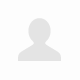
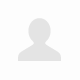

In [7]:
soup

In [8]:
tags = soup.select('tbody#regularTeamRecordList_table > tr')
tags

[<tr>
 <th><strong>1</strong></th>
 <td class="tm">
 <div>
 <img alt="구단로고" height="25" onerror="javaScript:noTeamEmblemImg(this, 'team', 'LG');" src="https://dthumb-phinf.pstatic.net/?src=https://sports-phinf.pstatic.net/team/kbo/default/LG.png&amp;type=f25_25&amp;refresh=1" width="25"/>
 <span id="team_LG">LG</span>
 </div>
 </td>
 <td><span>67</span></td>
 <td><span>39</span></td>
 <td><span>28</span></td>
 <td><span>0</span></td>
 <td><strong>0.582</strong></td>
 <td><span>0.0</span></td>
 <td><span>2패</span></td>
 <td><span>0.350</span></td>
 <td><span>0.392</span></td>
 <td><span>7승-3패-0무</span></td>
 </tr>,
 <tr>
 <th><strong>1</strong></th>
 <td class="tm">
 <div>
 <img alt="구단로고" height="25" onerror="javaScript:noTeamEmblemImg(this, 'team', 'SS');" src="https://dthumb-phinf.pstatic.net/?src=https://sports-phinf.pstatic.net/team/kbo/default/SS.png&amp;type=f25_25&amp;refresh=1" width="25"/>
 <span id="team_SS">삼성</span>
 </div>
 </td>
 <td><span>67</span></td>
 <td><span>39</sp

In [16]:
tags[0].select('th')

[<th><strong>1</strong></th>]

In [15]:
tags[0].select('span')[0]

<span id="team_LG">LG</span>

순위 : th
팀명 : span[]

In [18]:
contents = []
for tag in tags :
    content = []
    rank = tag.select('th')[0].text.strip()
    content.append(rank)
    for dt in tag.select('span') :
        data = dt.text.strip()
        content.append(data)
    contents.append(content)
contents

[['1', 'LG', '67', '39', '28', '0', '0.0', '2패', '0.350', '0.392', '7승-3패-0무'],
 ['1', '삼성', '67', '39', '28', '0', '0.0', '3승', '0.351', '0.411', '7승-3패-0무'],
 ['3', 'KT', '64', '37', '27', '0', '0.5', '1승', '0.367', '0.392', '6승-4패-0무'],
 ['3',
  'SSG',
  '64',
  '37',
  '27',
  '0',
  '0.5',
  '2승',
  '0.353',
  '0.417',
  '6승-4패-0무'],
 ['5', 'NC', '65', '33', '31', '1', '4.5', '1승', '0.363', '0.446', '4승-6패-0무'],
 ['6', '두산', '66', '33', '33', '0', '5.5', '2패', '0.361', '0.403', '4승-6패-0무'],
 ['7', '키움', '68', '33', '35', '0', '6.5', '2승', '0.351', '0.378', '6승-4패-0무'],
 ['8',
  '롯데',
  '66',
  '26',
  '39',
  '1',
  '12.0',
  '1패',
  '0.363',
  '0.409',
  '4승-6패-0무'],
 ['9',
  'KIA',
  '64',
  '25',
  '39',
  '0',
  '12.5',
  '1패',
  '0.342',
  '0.326',
  '3승-7패-0무'],
 ['10',
  '한화',
  '67',
  '26',
  '41',
  '0',
  '13.0',
  '5패',
  '0.333',
  '0.347',
  '4승-6패-0무']]

In [19]:
import pandas as pd

In [22]:
df = pd.DataFrame(contents, columns=['순위','팀','경기수','승','패','무','게임차','연속','출루율','장타율','최근10경기'])
df

,순위,팀,경기수,승,패,무,게임차,연속,출루율,장타율,최근10경기
0,1,LG,67,39,28,0,0.0,2패,0.350,0.392,7승-3패-0무
1,1,삼성,67,39,28,0,0.0,3승,0.351,0.411,7승-3패-0무
2,3,KT,64,37,27,0,0.5,1승,0.367,0.392,6승-4패-0무
3,3,SSG,64,37,27,0,0.5,2승,0.353,0.417,6승-4패-0무
4,5,NC,65,33,31,1,4.5,1승,0.363,0.446,4승-6패-0무
5,6,두산,66,33,33,0,5.5,2패,0.361,0.403,4승-6패-0무
6,7,키움,68,33,35,0,6.5,2승,0.351,0.378,6승-4패-0무
7,8,롯데,66,26,39,1,12.0,1패,0.363,0.409,4승-6패-0무
8,9,KIA,64,25,39,0,12.5,1패,0.342,0.326,3승-7패-0무
9,10,한화,67,26,41,0,13.0,5패,0.333,0.347,4승-6패-0무
